In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_pickle('saved_df.pkl')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(707, 9)

<AxesSubplot:>

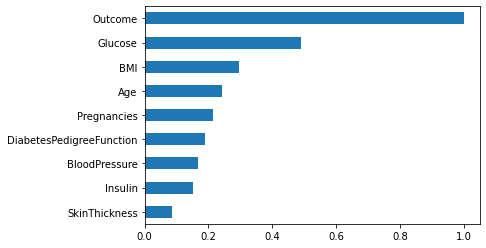

In [5]:
df.corr()['Outcome'].sort_values().plot.barh()

In [12]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[121,  16],
       [ 34,  42]])

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       137
           1       0.72      0.55      0.63        76

    accuracy                           0.77       213
   macro avg       0.75      0.72      0.73       213
weighted avg       0.76      0.77      0.76       213



## knn

In [15]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
536,0,105,90,0,0,29.6,0.197,46
74,1,79,75,30,0,32.0,0.396,22
242,3,139,54,0,0,25.6,0.402,22
630,7,114,64,0,0,27.4,0.732,34
537,0,57,60,0,0,21.7,0.735,67


In [16]:
y_train.head()

536    0
74     0
242    1
630    1
537    0
Name: Outcome, dtype: int64

In [17]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,3.597166,121.255061,73.054656,21.200405,85.892713,32.420648,0.475682,32.971660
std,3.117326,30.173597,12.192134,15.605504,121.364331,6.949658,0.341965,11.779379
min,0.000000,56.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.600000,0.245250,24.000000
50%,3.000000,116.000000,73.000000,23.000000,47.000000,32.150000,0.371000,29.000000
75%,5.750000,140.750000,80.000000,33.000000,130.000000,36.175000,0.625500,40.000000
max,12.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
a = pd.DataFrame(X_train, columns = X.columns)

In [20]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.155097,-0.539264,1.391268,-1.359898,-0.708444,-0.406280,-0.815770,1.107151
1,-0.833984,-1.401818,0.159719,0.564449,-0.708444,-0.060589,-0.233249,-0.932374
2,-0.191758,0.588691,-1.564449,-1.359898,-0.708444,-0.982431,-0.215686,-0.932374
3,1.092694,-0.240688,-0.743417,-1.359898,-0.708444,-0.723163,0.750304,0.087389
4,-1.155097,-2.131671,-1.071830,-1.359898,-0.708444,-1.544179,0.759086,2.891734


In [21]:
a.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02
mean,-1.078759e-17,9.663885e-17,-5.034210e-17,-3.416071e-17,1.258552e-17,4.872396e-16,-6.832142e-17,-2.067622e-17
std,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00
min,-1.155097e+00,-2.164847e+00,-2.713894e+00,-1.359898e+00,-7.084436e-01,-2.048311e+00,-1.164112e+00,-1.017354e+00
25%,-8.339836e-01,-7.383150e-01,-7.434166e-01,-1.359898e+00,-7.084436e-01,-6.943557e-01,-6.745306e-01,-7.624133e-01
50%,-1.917577e-01,-1.743374e-01,-4.487424e-03,1.154349e-01,-3.207873e-01,-3.898352e-02,-3.064300e-01,-3.375124e-01
75%,6.913029e-01,6.467476e-01,5.702353e-01,7.568840e-01,3.637972e-01,5.407688e-01,4.385529e-01,5.972696e-01
max,2.698259e+00,2.579200e+00,4.018571e+00,2.681231e+00,6.269369e+00,4.995139e+00,5.691488e+00,4.081457e+00


In [23]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [24]:
y_pred = knn_model.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred))

[[120  17]
 [ 37  39]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       137
           1       0.70      0.51      0.59        76

    accuracy                           0.75       213
   macro avg       0.73      0.69      0.70       213
weighted avg       0.74      0.75      0.74       213



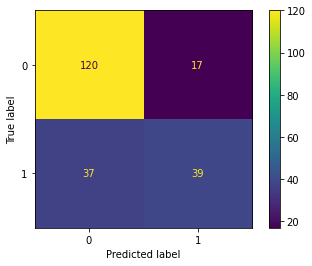

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test);

## model tuning

In [29]:
# GridSearchCV

In [30]:
knn = KNeighborsClassifier()

In [31]:
np.arange(1, 50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [32]:
knn_params = {'n_neighbors' : np.arange(1, 50)}

In [33]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [36]:
knn_cv_model.best_params_

{'n_neighbors': 15}

In [48]:
knn_tuned = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

In [49]:
y_pred = knn_tuned.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred))

[[121  16]
 [ 39  37]]


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       137
           1       0.70      0.49      0.57        76

    accuracy                           0.74       213
   macro avg       0.73      0.69      0.69       213
weighted avg       0.74      0.74      0.73       213



## GridSearch with recall

In [68]:
knn_cv_model = GridSearchCV(knn, knn_params, scoring = 'recall', cv = 10).fit(X_train, y_train)

In [69]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [114]:
knn_tuned = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

In [115]:
y_pred = knn_tuned.predict(X_test)

In [116]:
print(confusion_matrix(y_test, y_pred))

[[116  21]
 [ 37  39]]


In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       137
           1       0.65      0.51      0.57        76

    accuracy                           0.73       213
   macro avg       0.70      0.68      0.69       213
weighted avg       0.72      0.73      0.72       213



## Elbow Method

In [106]:
error_rate = []                                   # elbow method to select best k parameter

for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error_Rate')

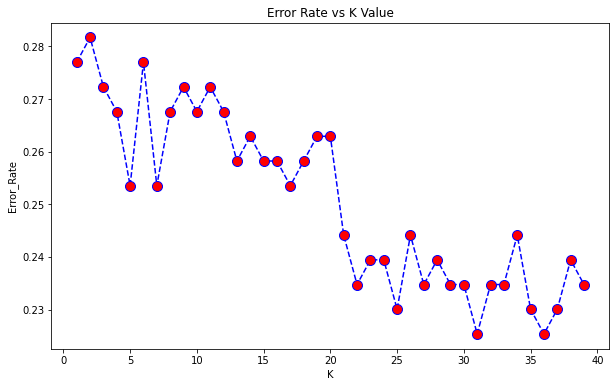

In [107]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, 'blue', ls = 'dashed', marker = 'o', mfc = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error_Rate')

In [108]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.7746478873239436 at K = 30


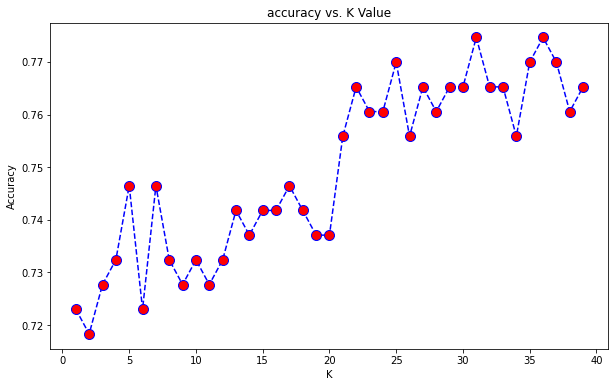

In [109]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

## model deployment

In [118]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



In [134]:
print(confusion_matrix(y_test, y_pred))

[[122  24]
 [ 31  36]]


## saving the model

In [119]:
import pickle
pickle.dump(log_model, open('my_model', 'wb'))

In [120]:
model = pickle.load(open('my_model', 'rb'))

## predictions and probabilities with the saved model

In [122]:
prediction = model.predict(X)

In [123]:
prediction[:5]

array([1, 0, 1, 0, 1])

In [148]:
prediction_prob = model.predict_proba(X)

In [124]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [127]:
df['Pred'] = prediction

In [152]:
df['Prob'] = prediction_prob[:,1]

In [153]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,Prob
0,6,148,72,35,0,33.6,0.627,50,1,1,0.680250
1,1,85,66,29,0,26.6,0.351,31,0,0,0.077422
2,8,183,64,0,0,23.3,0.672,32,1,1,0.886841
3,1,89,66,23,94,28.1,0.167,21,0,0,0.059203
4,0,137,40,35,168,43.1,2.288,33,1,1,0.993551


In [154]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,Prob
101,1,151,60,0,0,26.1,0.179,22,0,0,0.276854
662,8,167,106,46,231,37.6,0.165,43,1,0,0.345447
65,5,99,74,27,0,29.0,0.203,32,0,0,0.136551
544,1,88,78,29,76,32.0,0.365,29,0,0,0.077175
219,5,112,66,0,0,37.8,0.261,41,1,0,0.365790
728,2,175,88,0,0,22.9,0.326,22,0,0,0.303325
127,1,118,58,36,94,33.3,0.261,23,0,0,0.201690
202,0,108,68,20,0,27.3,0.787,32,0,0,0.273553
414,0,138,60,35,167,34.6,0.534,21,1,0,0.392596
6,3,78,50,32,88,31.0,0.248,26,1,0,0.133038


In [135]:
print(confusion_matrix(df['Outcome'], df['Pred']))

[[404  64]
 [114 125]]


In [136]:
print(classification_report(df['Outcome'], df['Pred']))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       468
           1       0.66      0.52      0.58       239

    accuracy                           0.75       707
   macro avg       0.72      0.69      0.70       707
weighted avg       0.74      0.75      0.74       707



In [138]:
my_dict={'Pregnancies':10,
        'Glucose':180,
        'BloodPressure':70,
        'SkinThickness':30,
        'Insulin':50,
        'BMI':38,
        'DiabetesPedigreeFunction':0.15,
        'Age':50}
df_sample=pd.DataFrame([my_dict])

In [139]:
df_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,180,70,30,50,38,0.15,50


In [140]:
single_pred=model.predict(df_sample)

In [141]:
print(single_pred)

[1]


In [142]:
single_pred_prob=model.predict_proba(df_sample)

In [147]:
print(single_pred_prob[:,1])

[0.79478985]
